# Bank Marketing - Análise Exploratória de Dados

Este projeto será baseado no Dataset Bank Marketing encontrado na UC Irvine - Machine Learning Repository e disponibilizado por S. Moro, R. Laureano e P. Cortez, e pode ser encontrado neste [link](https://archive.ics.uci.edu/dataset/222/bank+marketing).

## 1.1. Os dados, o problema, e o objetivo

### Estrutura dos dados
Os dados são relacionados com campanhas direta de marketing de uma instituição bancária portugesa. A campanha de marketing foi baseada em ligações telefonicas, por vezes mais de uma para o memso cliente, para saber se o produto financeiro (termo de depósito bancário) seria aceito ou não.

|Coluna|Descrição|
|-|-|
|age|Idade|
|job|Tipo de trabalho|
|marital|Estado civil|
|education|Nível de educação|
|default|Se deu prejuízo ao banco|
|balance|Média de balanço anual|
|housing|Se possui emprestimo imobiliário|
|loan|Se possui emprestimo bancário|
|contact|Tipo de contato (celular, ou telefone fixo)|
|day_of_week|Dia do contato|
|month|Mês do contato|
|duration|Duração das ligações em segundos|
|campaign|Número de contatos feitos|
|pdays|Número de dias desde que o cliente foi contato por uma campanha anterior (-1 significa que não foi contatado)|
|previous|Número de contatos antes dessa campanha, para este cliente|
|poutcome|Resultado da última campanha (falha, sucesso)|
|y|Se o cliente aceitou essa campanha|

### O problema
Como recém chegado no time de dados, o gestor nos fez algumas solicitações a partir dos dados dessa campanha após requisição do time de marketing para otimizar as próximas campanhas:

1. Entender o perfil dos clientes do banco e identificar características que influenciam a aceitação dos produtos oferecidos;
2. Avaliar a eficácia da campanha de marketing direto para depósitos a prazo, identificando os melhores canais de contato e o perfil do público-alvo mais receptivo.

### O objetivo
Dessa forma com os dados em mãos, nosso objetivo será:
- Buscar a relação entre as variáveis, e como elas influenciam na aceitação dos produtos;
- Identificar o perfil dos clientes mais propensos a fechar negócios após as campanhas;
- Entender como e quais os fatores da campanha que influenciam na aceitação das ofertas;

## 1.2. Importação das bibliotecas e carregamento dos dados

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
my_palette = sns.color_palette(["#497178","#58aba1","#d5b881","#c59781","#b47580","#6e7091","#284261","#33343d", "#f5f5f7"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [2]:
df = pd.read_csv("data/raw/bank-full.csv", sep = ";")

# 2. Entendendo os dados

In [3]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame possui 45211 linhas e 17 colunas.


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericas = df.select_dtypes(include = numerics)
nao_numericas = df.select_dtypes(exclude = numerics)

print(
    f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas'
)

Temos 7 colunas numéricas e 10 colunas não-numéricas


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Algumas conclusões antes de prosseguir

- O dataset não contém dados nulos;
- As colunas estão no formato correto;
- Acredito ser necessário buscar outliers e duplicatas.

# 3. Limpeza e manipulação dos dados

## 3.1. Conferindo nulos e duplicatas

In [8]:
print(f'O conjunto de dados tem {df.isna().sum().sum()} dados nulos.')

O conjunto de dados tem 0 dados nulos.


In [9]:
print(f'O conjunto de dados tem {df.duplicated().sum()} dados duplicados.')

O conjunto de dados tem 0 dados duplicados.


## 3.2. Os outliers (ou dados extremos)

### Balance

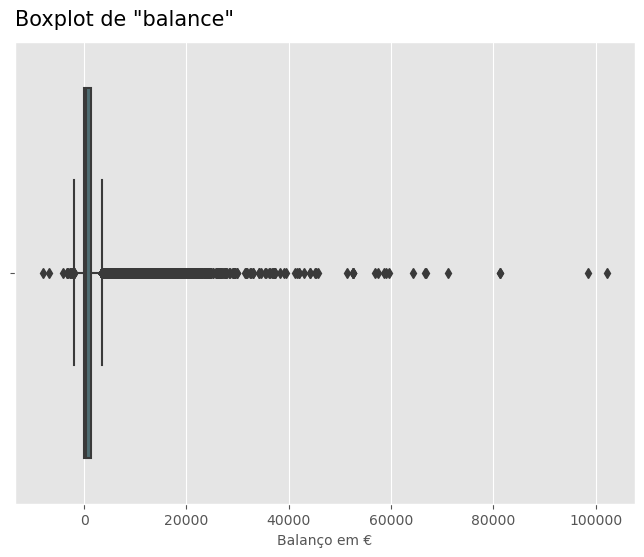

In [10]:
# Visualizando os extremos com um boxplot
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(df, x = 'balance')
ax.set_title('Boxplot de "balance"', fontsize = 15, pad = 12, loc = 'left')
ax.set_xlabel('Balanço em €', fontsize = 10)
plt.show()

In [11]:
# Calculando os quartis, e o intervalo interquartil
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites inferior e superior
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Outliers
out_b = df[(df['balance'] < limite_inf) | (df['balance'] > limite_sup)]

In [12]:
# Remoção dos outliers no balance
df = df[(df['balance'] >= limite_inf) & (df['balance'] <= limite_sup)]
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40482 entries, 0 to 40481
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40482 non-null  int64 
 1   job        40482 non-null  object
 2   marital    40482 non-null  object
 3   education  40482 non-null  object
 4   default    40482 non-null  object
 5   balance    40482 non-null  int64 
 6   housing    40482 non-null  object
 7   loan       40482 non-null  object
 8   contact    40482 non-null  object
 9   day        40482 non-null  int64 
 10  month      40482 non-null  object
 11  duration   40482 non-null  int64 
 12  campaign   40482 non-null  int64 
 13  pdays      40482 non-null  int64 
 14  previous   40482 non-null  int64 
 15  poutcome   40482 non-null  object
 16  y          40482 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.3+ MB


### Duration

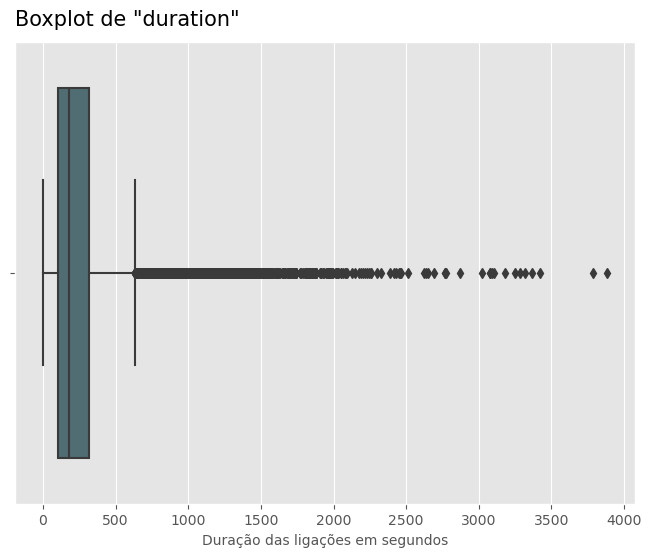

In [13]:
# Visualizando os extremos com um boxplot
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(df, x = 'duration')
ax.set_title('Boxplot de "duration"', fontsize = 15, pad = 12, loc = 'left')
ax.set_xlabel('Duração das ligações em segundos', fontsize = 10)
plt.show()

In [14]:
# Calculando os quartis, e o intervalo interquartil
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites inferior e superior
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Outliers
out_b = df[(df['duration'] < limite_inf) | (df['duration'] > limite_sup)]

In [15]:
# Remoção dos outliers no duration
df = df[(df['duration'] >= limite_inf) & (df['duration'] <= limite_sup)]
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37572 entries, 0 to 37571
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        37572 non-null  int64 
 1   job        37572 non-null  object
 2   marital    37572 non-null  object
 3   education  37572 non-null  object
 4   default    37572 non-null  object
 5   balance    37572 non-null  int64 
 6   housing    37572 non-null  object
 7   loan       37572 non-null  object
 8   contact    37572 non-null  object
 9   day        37572 non-null  int64 
 10  month      37572 non-null  object
 11  duration   37572 non-null  int64 
 12  campaign   37572 non-null  int64 
 13  pdays      37572 non-null  int64 
 14  previous   37572 non-null  int64 
 15  poutcome   37572 non-null  object
 16  y          37572 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.9+ MB


### Campaign

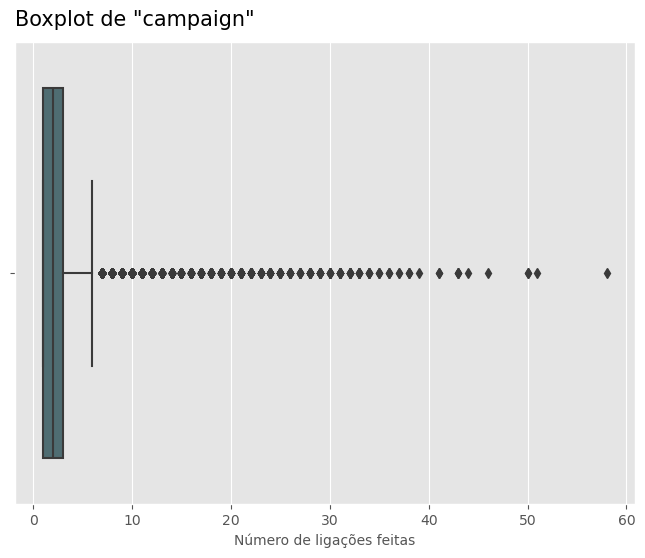

In [16]:
# Visualizando os extremos com um boxplot
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(df, x = 'campaign')
ax.set_title('Boxplot de "campaign"', fontsize = 15, pad = 12, loc = 'left')
ax.set_xlabel('Número de ligações feitas', fontsize = 10)
plt.show()

In [17]:
# Calculando os quartis, e o intervalo interquartil
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Calculando os limites inferior e superior
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Outliers
out_b = df[(df['campaign'] < limite_inf) | (df['campaign'] > limite_sup)]

In [18]:
# Remoção dos outliers no campaign
df = df[(df['campaign'] >= limite_inf) & (df['campaign'] <= limite_sup)]
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34967 entries, 0 to 34966
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        34967 non-null  int64 
 1   job        34967 non-null  object
 2   marital    34967 non-null  object
 3   education  34967 non-null  object
 4   default    34967 non-null  object
 5   balance    34967 non-null  int64 
 6   housing    34967 non-null  object
 7   loan       34967 non-null  object
 8   contact    34967 non-null  object
 9   day        34967 non-null  int64 
 10  month      34967 non-null  object
 11  duration   34967 non-null  int64 
 12  campaign   34967 non-null  int64 
 13  pdays      34967 non-null  int64 
 14  previous   34967 non-null  int64 
 15  poutcome   34967 non-null  object
 16  y          34967 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.5+ MB


#### Agora com os dados limpos e livres de outliers podemos prosseguir a análise. 

# 4. Análise exploratória

## 4.1. O perfil dos clientes

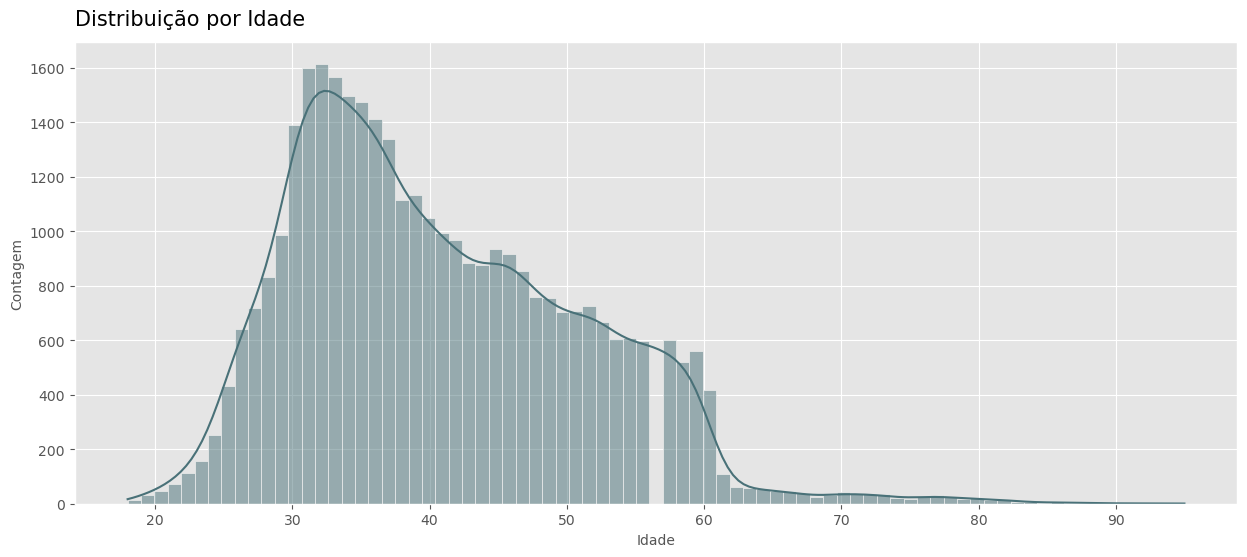

In [19]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.histplot(df, x = 'age', kde = True)
ax.set_title('Distribuição por Idade', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Idade', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

A grande massa dos clientes está entre 20  e 60 anos de idade. 

In [20]:
job_dist = df['job'].value_counts(normalize = True).reset_index()
job_dist['proportion'] = (job_dist['proportion'] * 100).round(2)
job_dist.rename(columns = ({'job': 'Trabalho', 'proportion': 'Porcentagem (%)'}), inplace = True)
job_dist

,Trabalho,Porcentagem (%)
0,blue-collar,21.98
1,management,19.99
2,technician,16.82
3,admin.,11.95
4,services,9.51
5,retired,4.83
6,self-employed,3.37
7,entrepreneur,3.27
8,unemployed,2.81
9,housemaid,2.70


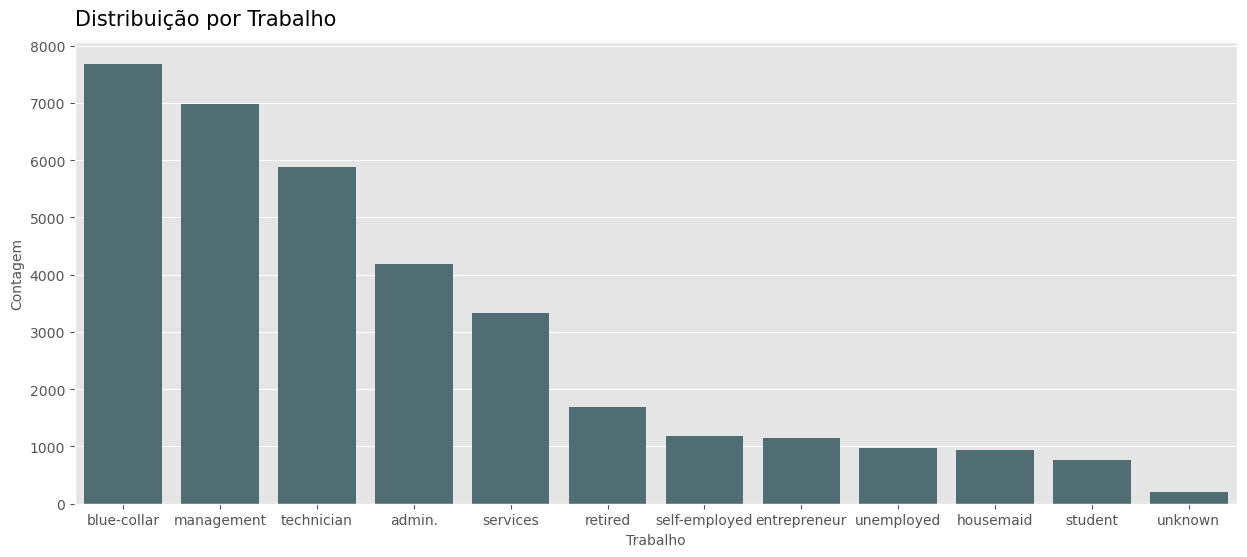

In [21]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['job'].value_counts().index, y = df['job'].value_counts().values, color = '#497178') 
ax.set_title('Distribuição por Trabalho', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Trabalho', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

Os clientes do banco em maior número estão em posições de trabalho operacionais e de gerenciamento. Outra parcela relevante está em posições de técnico e administrativas.

In [22]:
ed_dist = df['education'].value_counts(normalize = True).reset_index()
ed_dist['proportion'] = (ed_dist['proportion'] * 100).round(2)
ed_dist.rename(columns = ({'education': 'Nível de Educação', 'proportion': 'Porcentagem (%)'}), inplace = True)
ed_dist

,Nível de Educação,Porcentagem (%)
0,secondary,52.69
1,tertiary,28.18
2,primary,15.15
3,unknown,3.98


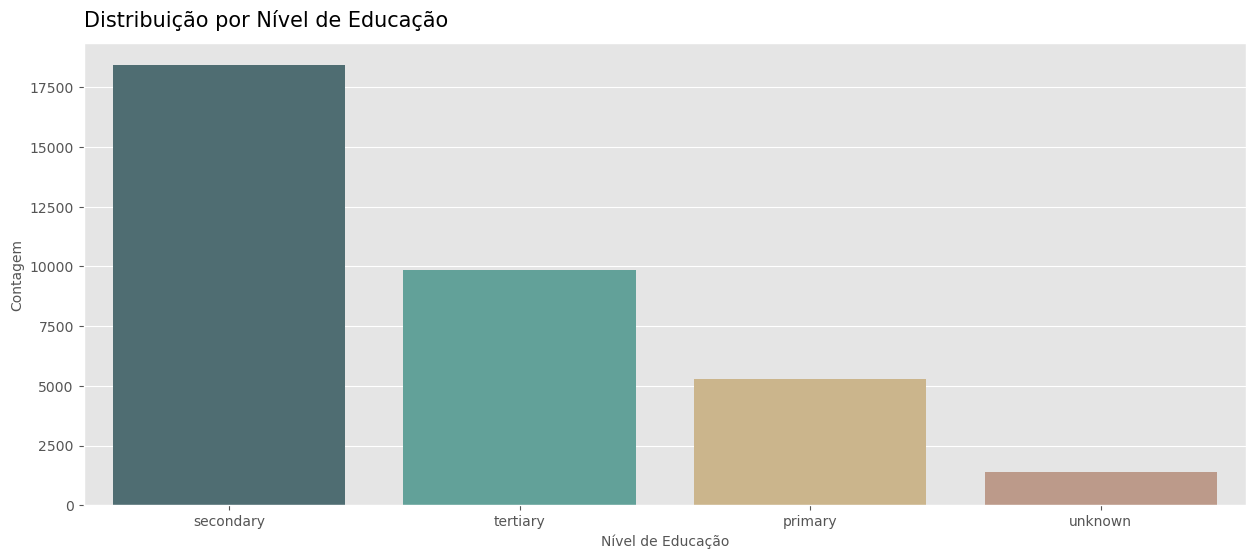

In [23]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['education'].value_counts().index, y = df['education'].value_counts().values) 
ax.set_title('Distribuição por Nível de Educação', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Nível de Educação', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

50% dos clientes do banco tem como nível de educação o segundo grau completo, somente cerca de 30% tem ensino superior. O restante está distribuido entre o nível primiário e não informado. 

In [24]:
marital_dist = df['marital'].value_counts(normalize = True).reset_index()
marital_dist['proportion'] = (marital_dist['proportion'] * 100).round(2)
marital_dist.rename(columns = ({'marital': 'Estado Civil', 'proportion': 'Porcentagem (%)'}), inplace = True)
marital_dist

,Estado Civil,Porcentagem (%)
0,married,59.71
1,single,28.52
2,divorced,11.77


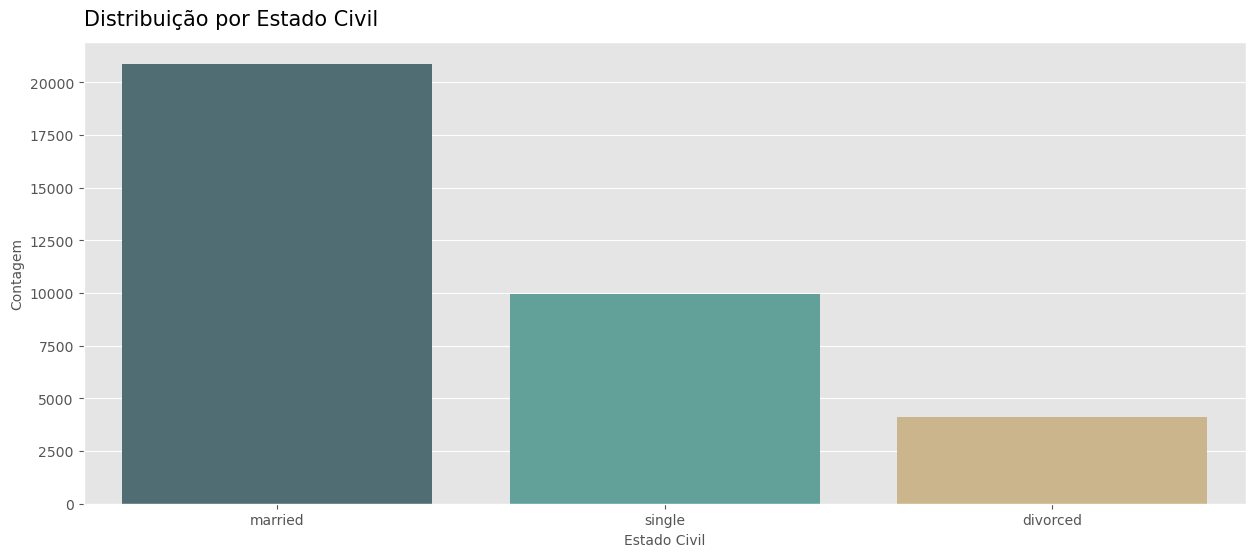

In [25]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['marital'].value_counts().index, y = df['marital'].value_counts().values) 
ax.set_title('Distribuição por Estado Civil', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Estado Civil', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

Entre os clientes do banco 60% são casados, o restante está distribuido entre solteiro e divorciados. 

In [26]:
default_dist = df['default'].value_counts(normalize = True).reset_index()
default_dist['proportion'] = (default_dist['proportion'] * 100).round(2)
default_dist.rename(columns = ({'default': 'Possui dívida?', 'proportion': 'Porcentagem (%)'}), inplace = True)
default_dist

,Possui dívida?,Porcentagem (%)
0,no,98.07
1,yes,1.93


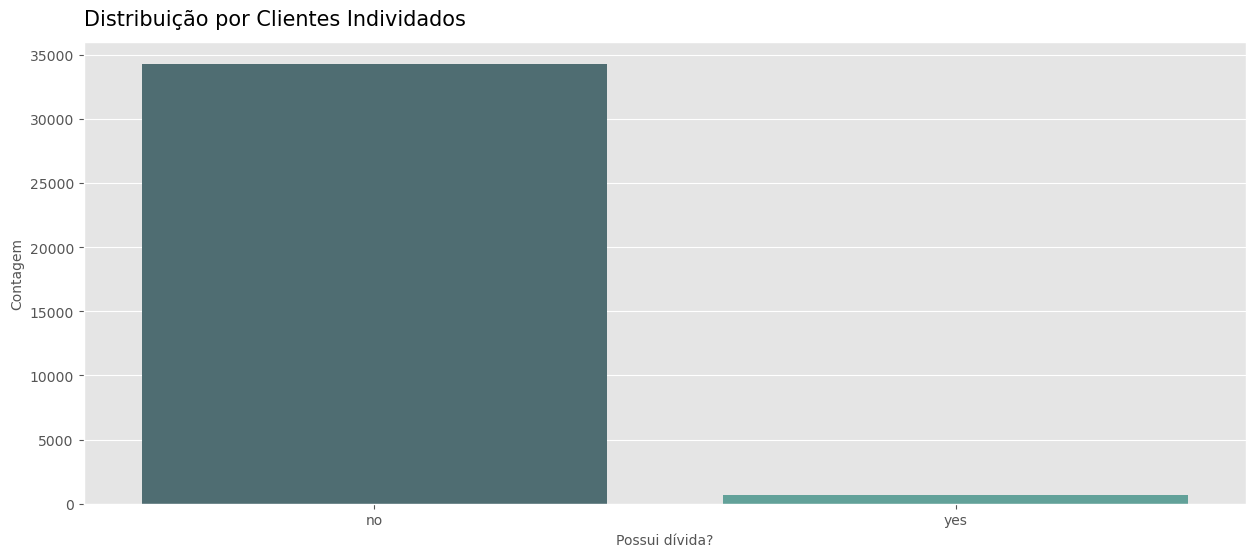

In [27]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['default'].value_counts().index, y = df['default'].value_counts().values, palette = my_palette) 
ax.set_title('Distribuição por Clientes Individados', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Possui dívida?', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

Existe um número baixíssimo de clientes inadimplentes junto ao banco, o que mostra potencial para novos emprestimos. 

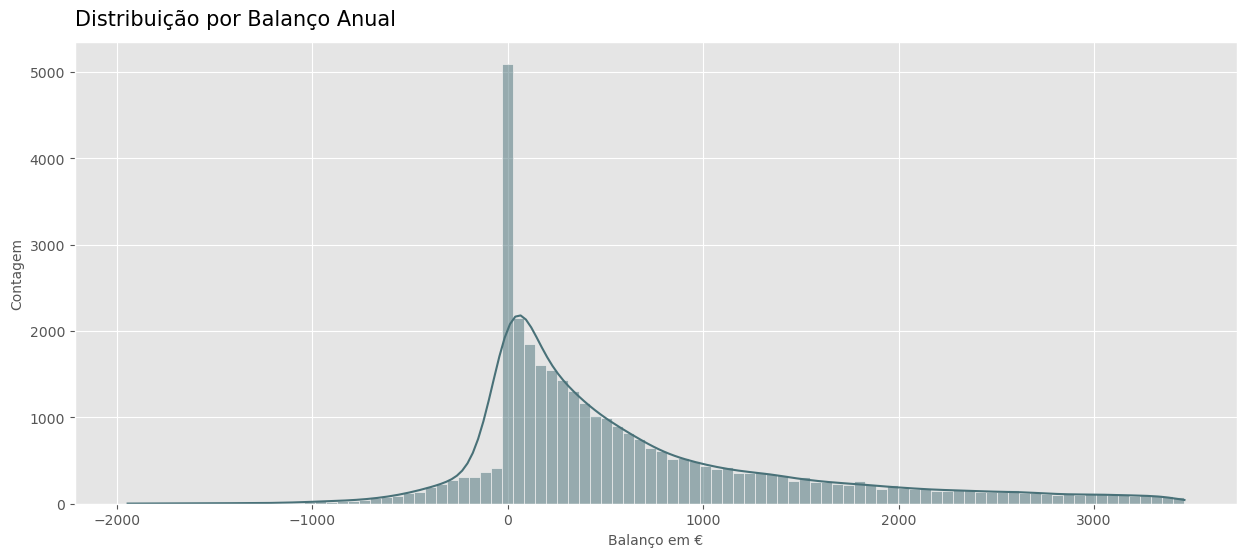

In [28]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.histplot(df, x = 'balance', kde = True)
ax.set_title('Distribuição por Balanço Anual', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Balanço em €', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

In [29]:
housing_dist = df['housing'].value_counts(normalize = True).reset_index()
housing_dist['proportion'] = (housing_dist['proportion'] * 100).round(2)
housing_dist.rename(columns = ({'housing': 'Possui financimento imobiliário?', 'proportion': 'Porcentagem (%)'}), inplace = True)
housing_dist

,Possui financimento imobiliário?,Porcentagem (%)
0,yes,56.64
1,no,43.36


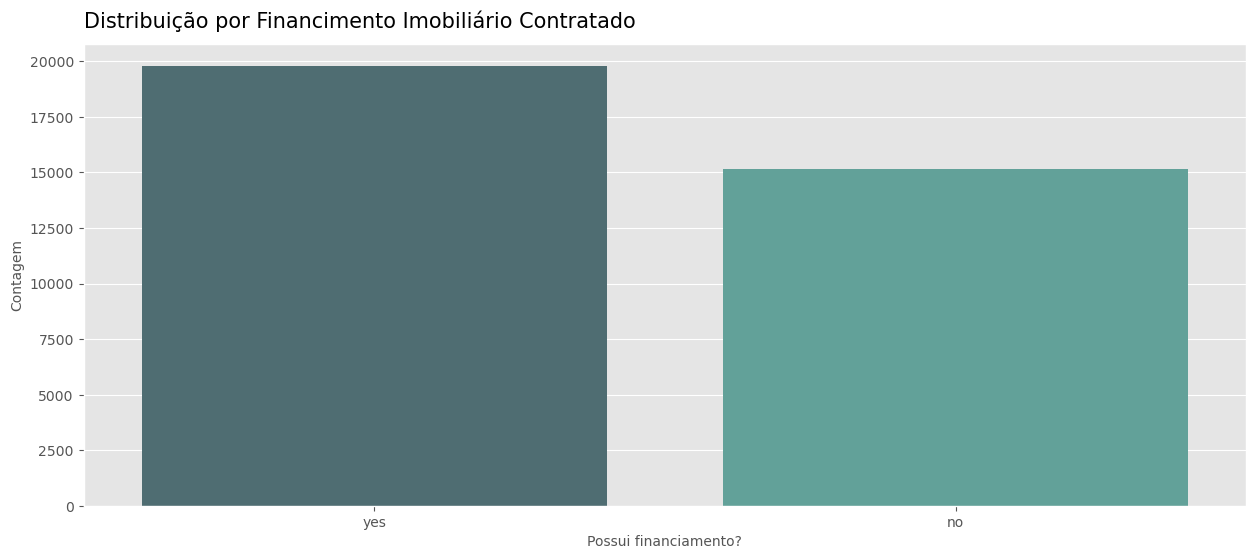

In [30]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['housing'].value_counts().index, y = df['housing'].value_counts().values, palette = my_palette) 
ax.set_title('Distribuição por Financimento Imobiliário Contratado', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Possui financiamento?', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

Mais da metade dos clientes possui financiamento de imóvel, pessoas sem este tipo de divida tem maior potencial para adquirir produtos do bancário. 

In [31]:
loan_dist = df['loan'].value_counts(normalize = True).reset_index()
loan_dist['proportion'] = (loan_dist['proportion'] * 100).round(2)
loan_dist.rename(columns = ({'loan': 'Possui emprestimo?', 'proportion': 'Porcentagem (%)'}), inplace = True)
loan_dist

,Possui emprestimo?,Porcentagem (%)
0,no,83.07
1,yes,16.93


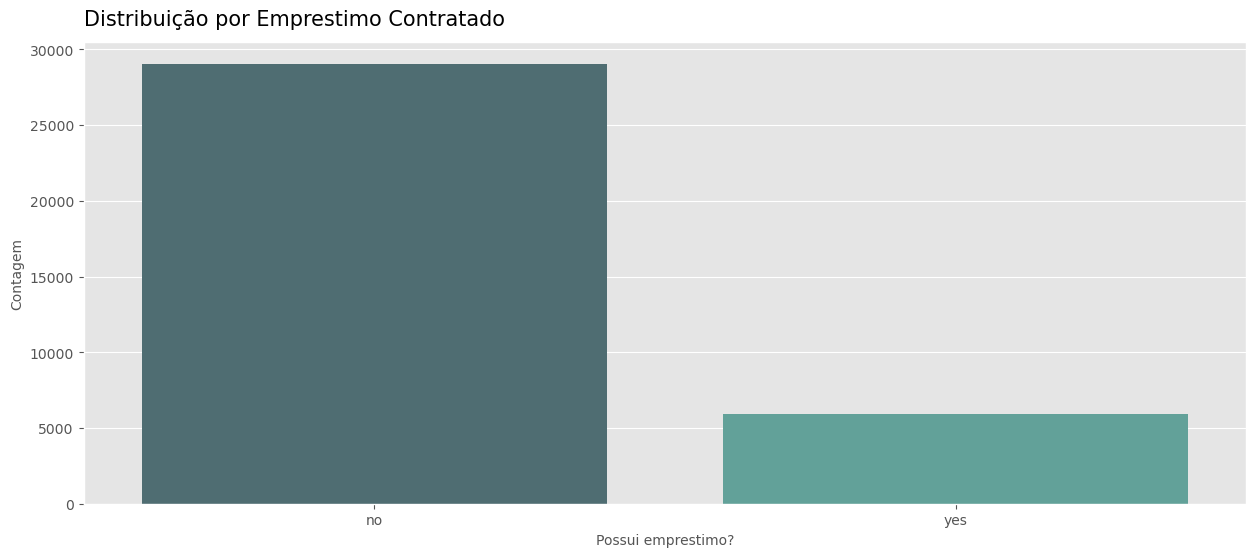

In [32]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['loan'].value_counts().index, y = df['loan'].value_counts().values, palette = my_palette) 
ax.set_title('Distribuição por Emprestimo Contratado', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Possui emprestimo?', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

Existe uma margem muito grande de pessoas sem um emprestimo contratado, o que aponta possível disponibilidade de crédito para contratar produtos bancários.

### Trabalho x Aceitação do Produto

In [97]:
suc_job = pd.crosstab(index = df['job'], columns = df['y']).reset_index()
suc_job['taxa_sucesso'] = ((suc_job['yes'] / (suc_job['yes'] + suc_job['no'])) * 100).round(2)
suc_job = suc_job.sort_values(by = 'taxa_sucesso', ascending = False)
suc_job

y,job,no,yes,taxa_sucesso
8,student,561,201,26.38
5,retired,1364,325,19.24
10,unemployed,858,124,12.63
11,unknown,183,22,10.73
4,management,6244,745,10.66
0,admin.,3789,390,9.33
6,self-employed,1076,101,8.58
9,technician,5404,479,8.14
3,housemaid,882,62,6.57
7,services,3138,189,5.68


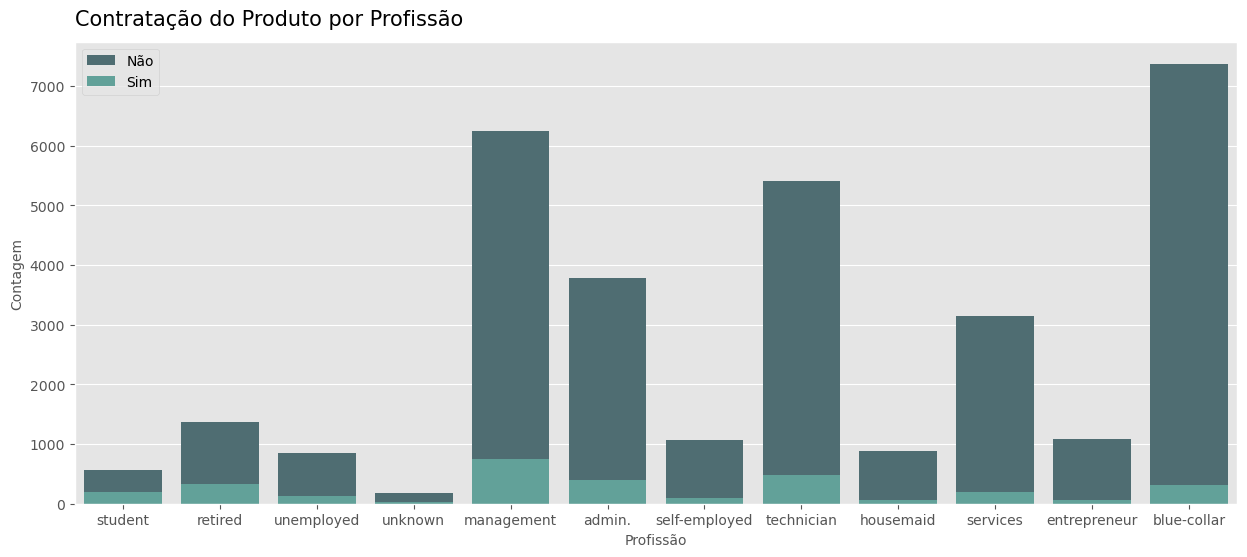

In [98]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_job, x = 'job', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_job, x = 'job', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Contratação do Produto por Profissão', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Profissão', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

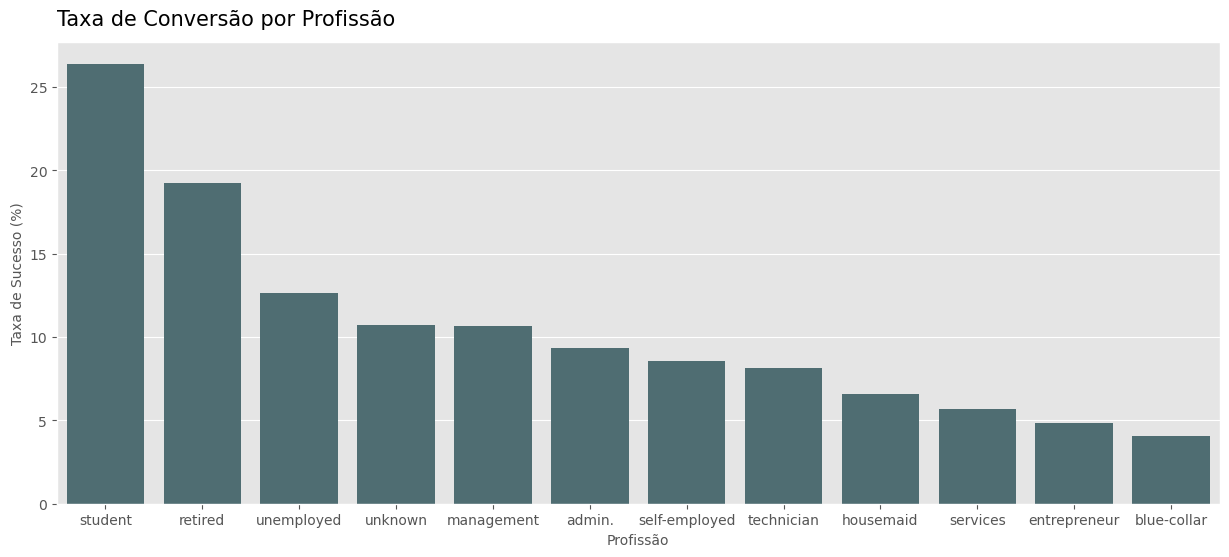

In [99]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_job, x = 'job', y = 'taxa_sucesso', color = '#497178')
ax.set_title('Taxa de Conversão por Profissão', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Profissão', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

Estudantes são os clientes com maior taxa de conversão, seguidos por aposentados, desempregados e pessoas em função de gerencia. Estudantes e desempregados tem uma capacidade de endividamento baixa, e podem no futuro se tornar inadimplentes.

### Idade x Aceitação do Produto

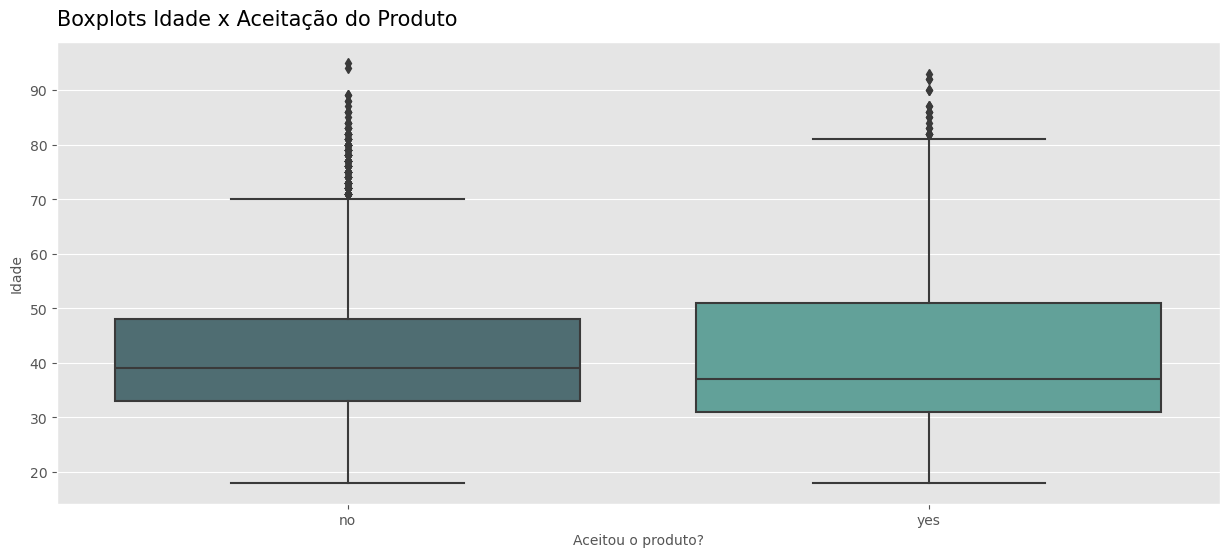

In [36]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.boxplot(df, x = 'y', y = 'age')
ax.set_title('Boxplots Idade x Aceitação do Produto', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Aceitou o produto?', fontsize = 10)
ax.set_ylabel('Idade', fontsize = 10)
plt.show()

Consumidores mais velhos tem maior tendência de aceitar o produto bancário, especialmente aqueles entre 30 e 50 anos de idade.

### Estado Civil x Aceitação do Produto

In [100]:
suc_marital = pd.crosstab(index = df['marital'], columns = df['y']).reset_index()
suc_marital['taxa_sucesso'] = ((suc_marital['yes'] / (suc_marital['yes'] + suc_marital['no'])) * 100).round(2)
suc_marital

y,marital,no,yes,taxa_sucesso
0,divorced,3781,333,8.09
1,married,19348,1532,7.34
2,single,8831,1142,11.45


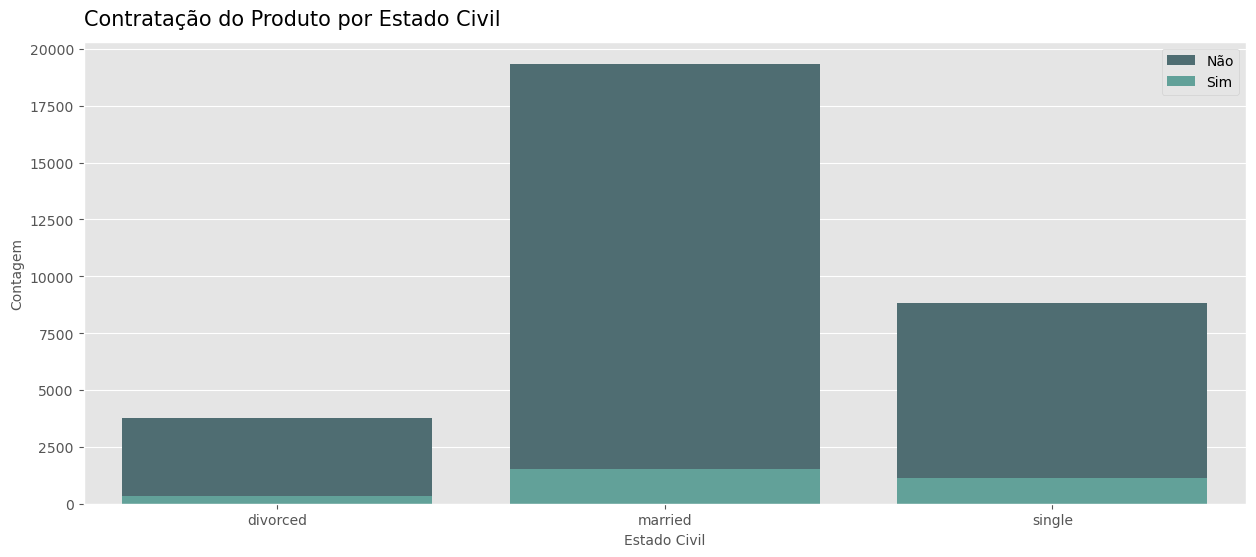

In [101]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_marital, x = 'marital', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_marital, x = 'marital', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Contratação do Produto por Estado Civil', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Estado Civil', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

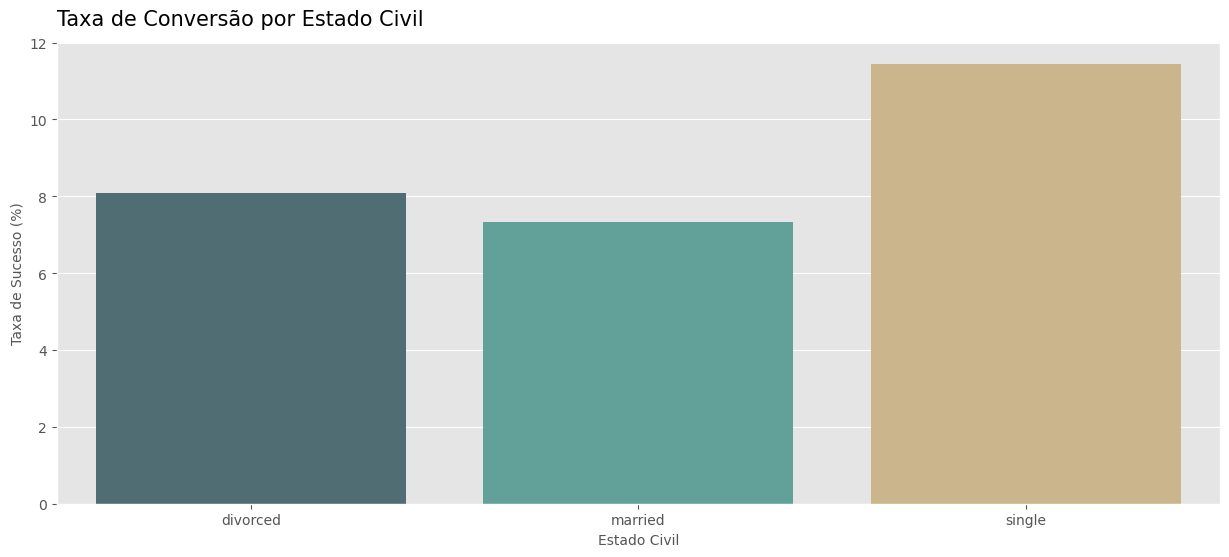

In [102]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_marital, x = 'marital', y = 'taxa_sucesso')
ax.set_title('Taxa de Conversão por Estado Civil', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Estado Civil', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

Apesar do maior volume maior de aceitação do produto estar entre os clientes casados, a taxa de conversão é maior entre solteiros e divorciados.

### Escolaridade x Aceitação do Produto

In [103]:
suc_ed = pd.crosstab(index = df['education'], columns = df['y']).reset_index()
suc_ed['taxa_sucesso'] = ((suc_ed['yes'] / (suc_ed['yes'] + suc_ed['no'])) * 100).round(2)
suc_ed

y,education,no,yes,taxa_sucesso
0,primary,5028,270,5.10
1,secondary,17020,1403,7.62
2,tertiary,8673,1180,11.98
3,unknown,1239,154,11.06


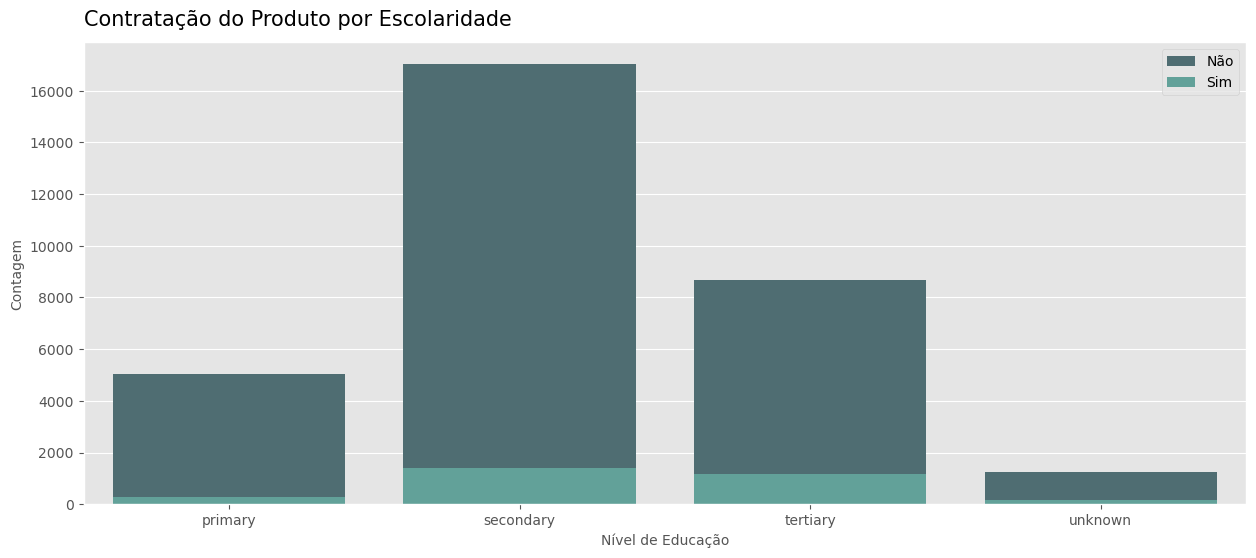

In [104]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_ed, x = 'education', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_ed, x = 'education', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Contratação do Produto por Escolaridade', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Nível de Educação', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

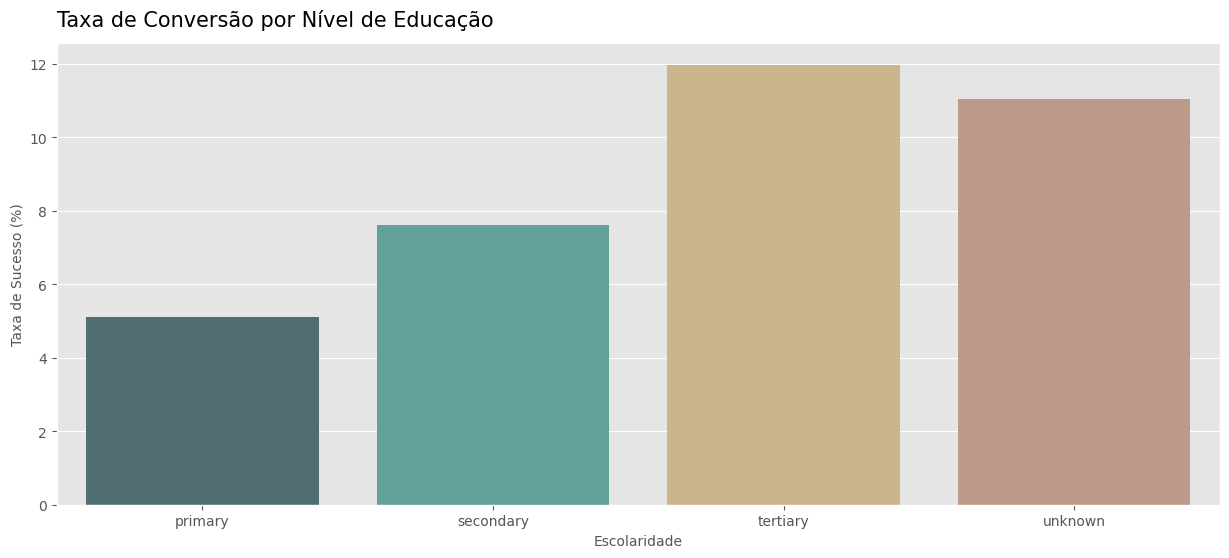

In [105]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_ed, x = 'education', y = 'taxa_sucesso')
ax.set_title('Taxa de Conversão por Nível de Educação', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Escolaridade', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

A taxa de conversão é maior em indivudos com nível superior completo e com nível educacional desconhecido, o maior volume se divide em nível de superior e de ensino médio completo.

### Balanço x Aceitação do Produto

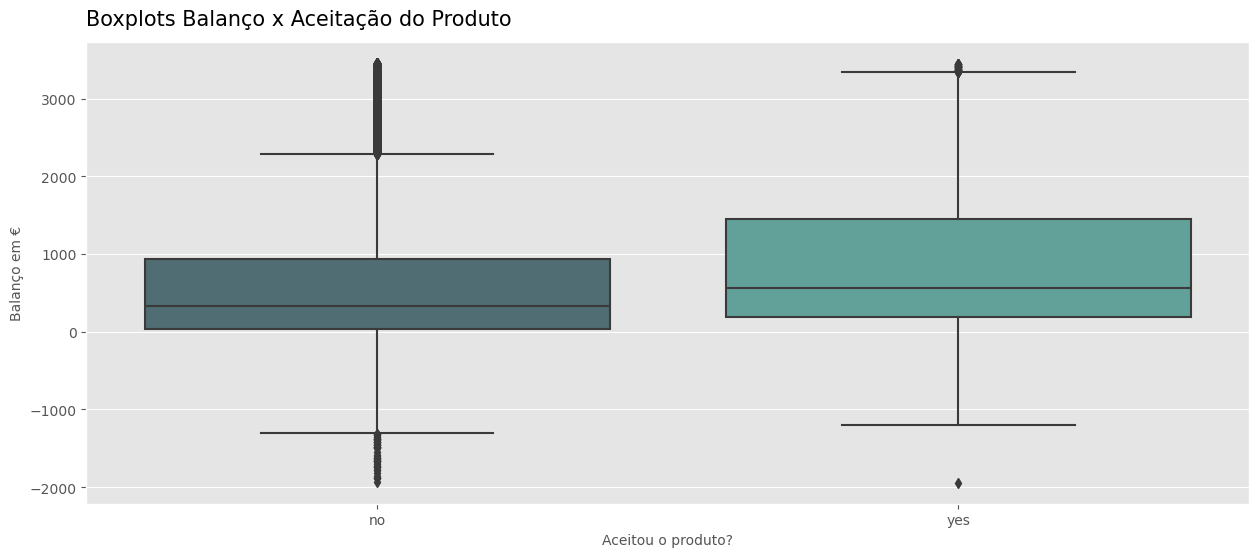

In [43]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.boxplot(df, x = 'y', y = 'balance')
ax.set_title('Boxplots Balanço x Aceitação do Produto', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Aceitou o produto?', fontsize = 10)
ax.set_ylabel('Balanço em €', fontsize = 10)
plt.show()

Maior balanço em conta indica maior espaço no orçamento para um investimento, é outro público que deve ser focado.

### Financiamento Imobiliário x Aceitação do Produto

In [106]:
suc_ho = pd.crosstab(index = df['housing'], columns = df['y']).reset_index()
suc_ho['taxa_sucesso'] = ((suc_ho['yes'] / (suc_ho['yes'] + suc_ho['no'])) * 100).round(2)
suc_ho

y,housing,no,yes,taxa_sucesso
0,no,13042,2121,13.99
1,yes,18918,886,4.47


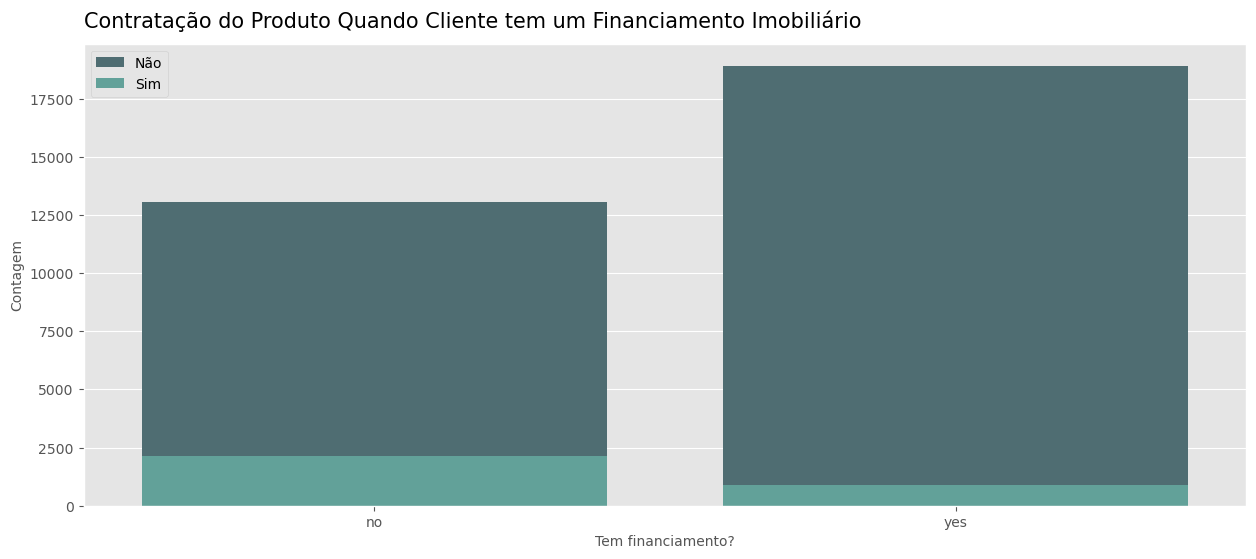

In [107]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_ho, x = 'housing', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_ho, x = 'housing', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Contratação do Produto Quando Cliente tem um Financiamento Imobiliário', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Tem financiamento?', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

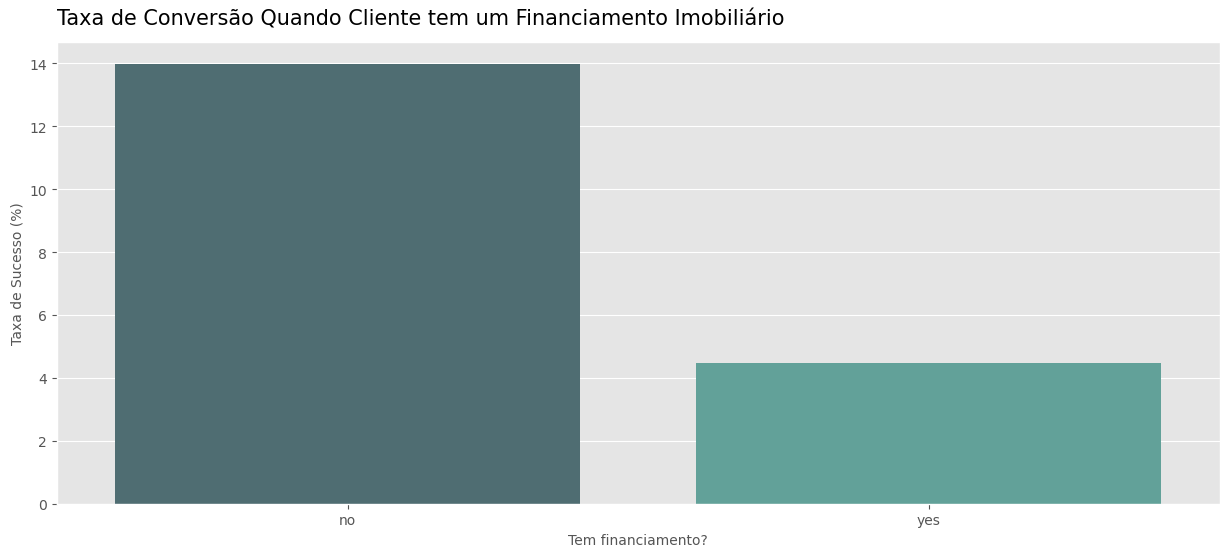

In [108]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_ho, x = 'housing', y = 'taxa_sucesso')
ax.set_title('Taxa de Conversão Quando Cliente tem um Financiamento Imobiliário', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Tem financiamento?', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

A taxa de conversão sobre pessoas sem um financiamento imobiliário é o triplo das que tem, além do volume também ser maior. 

### Emprestimos x Aceitação do Produto

In [109]:
suc_loan = pd.crosstab(index = df['loan'], columns = df['y']).reset_index()
suc_loan['taxa_sucesso'] = ((suc_loan['yes'] / (suc_loan['yes'] + suc_loan['no'])) * 100).round(2)
suc_loan

y,loan,no,yes,taxa_sucesso
0,no,26256,2791,9.61
1,yes,5704,216,3.65


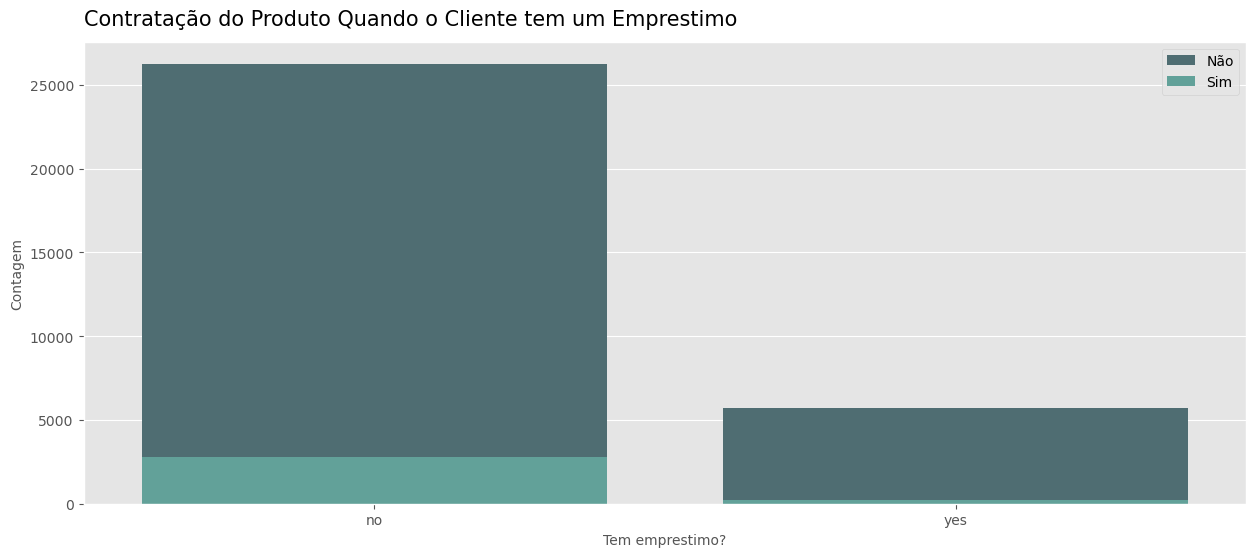

In [110]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_loan, x = 'loan', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_loan, x = 'loan', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Contratação do Produto Quando o Cliente tem um Emprestimo', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Tem emprestimo?', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

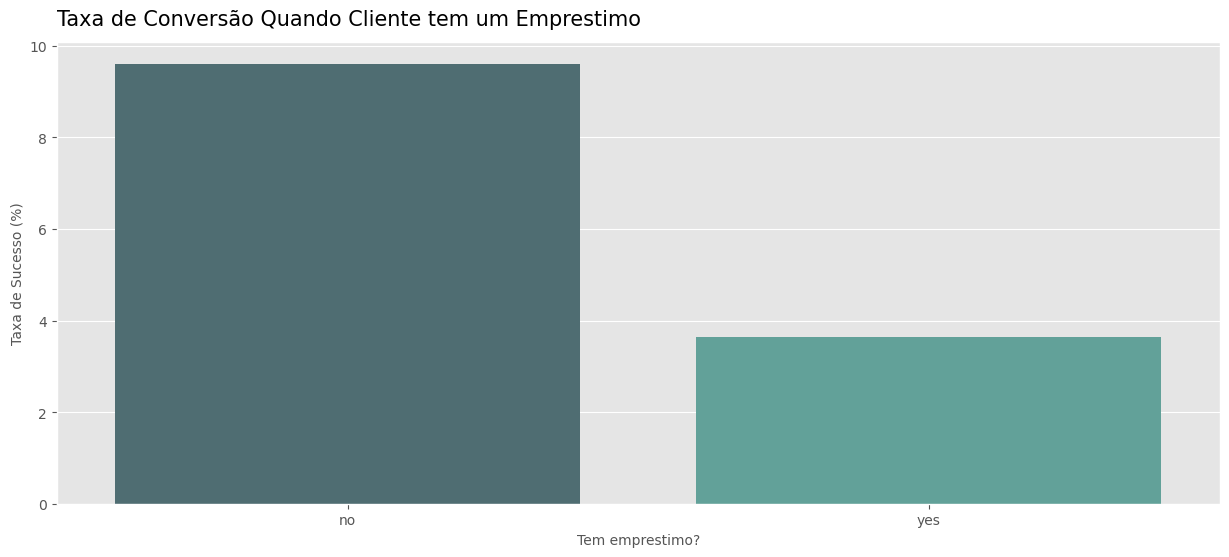

In [111]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_loan, x = 'loan', y = 'taxa_sucesso')
ax.set_title('Taxa de Conversão Quando Cliente tem um Emprestimo', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Tem emprestimo?', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

Pessoas sem emprestimos, claramente, tem maior potencial para adquirir novos produtos financeiros.

### Algumas conclusões

#### O cliente mais inclinado a contratar o produto tem:
- Entre 30 e 50 anos de idade;
- Maior balanço em conta;
- É solteiro ou divorciado;
- Não emprestimos ou financiamentos imobiliários ativos;
- Tem escolaridade de nível superior ou secundária;
- É estudante, aposentado ou está em cargos de gerencia;

A partir desses pontos, o time de marketing tem uma segmentação parar criar campanhas direcionadas para estes públicos. 

## 4.2. A campanha 

In [50]:
cont_dist = df['contact'].value_counts(normalize = True).reset_index()
cont_dist['proportion'] = (cont_dist['proportion'] * 100).round(2)
cont_dist.rename(columns = {'contact': 'Meio de Contato', 'proportion': 'Porcentagem (%)'}, inplace = True)
cont_dist

,Meio de Contato,Porcentagem (%)
0,cellular,64.76
1,unknown,29.35
2,telephone,5.89


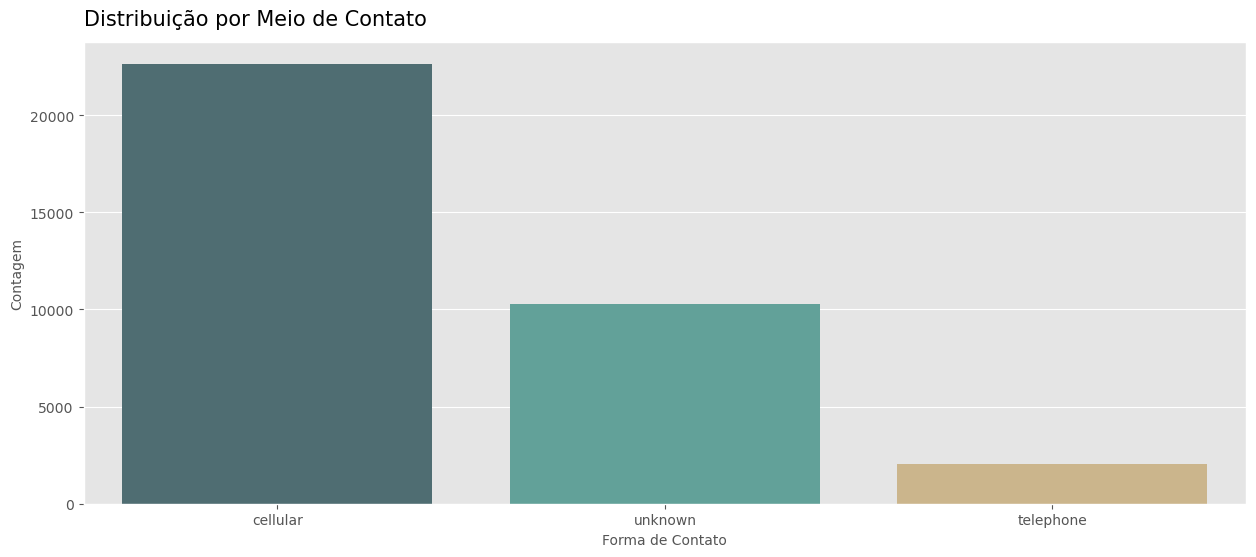

In [51]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['contact'].value_counts().index, y = df['contact'].value_counts().values, palette = my_palette) 
ax.set_title('Distribuição por Meio de Contato', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Forma de Contato', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

É necessário fazer um tracking melhor dos meios de contato, o celular é a forma mais comum mas existe um grande volume desconhecido. 

In [52]:
campaign_total = df.groupby('month').agg(n_clients = ('campaign', 'count')).reset_index()
campaign_total

,month,n_clients
0,apr,2316
1,aug,4513
2,dec,157
3,feb,2139
4,jan,1230
5,jul,5241
6,jun,3941
7,mar,365
8,may,11270
9,nov,2789


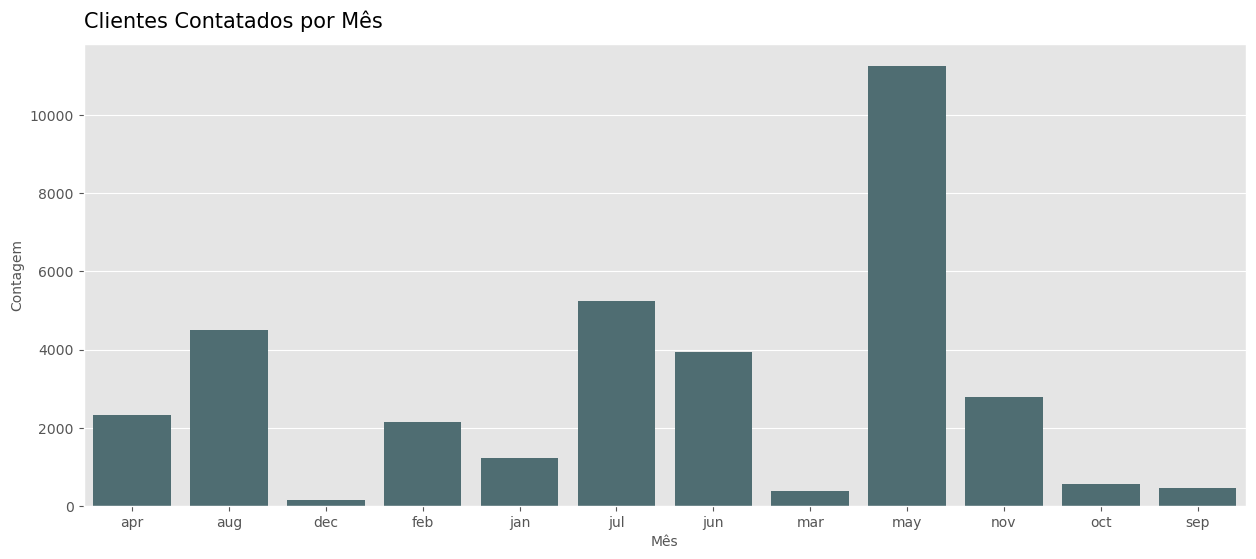

In [53]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(campaign_total, x = 'month', y = 'n_clients', color = '#497178')
ax.set_title('Clientes Contatados por Mês', fontsize = '15', pad = '12', loc = 'left')
ax.set_xlabel('Mês', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

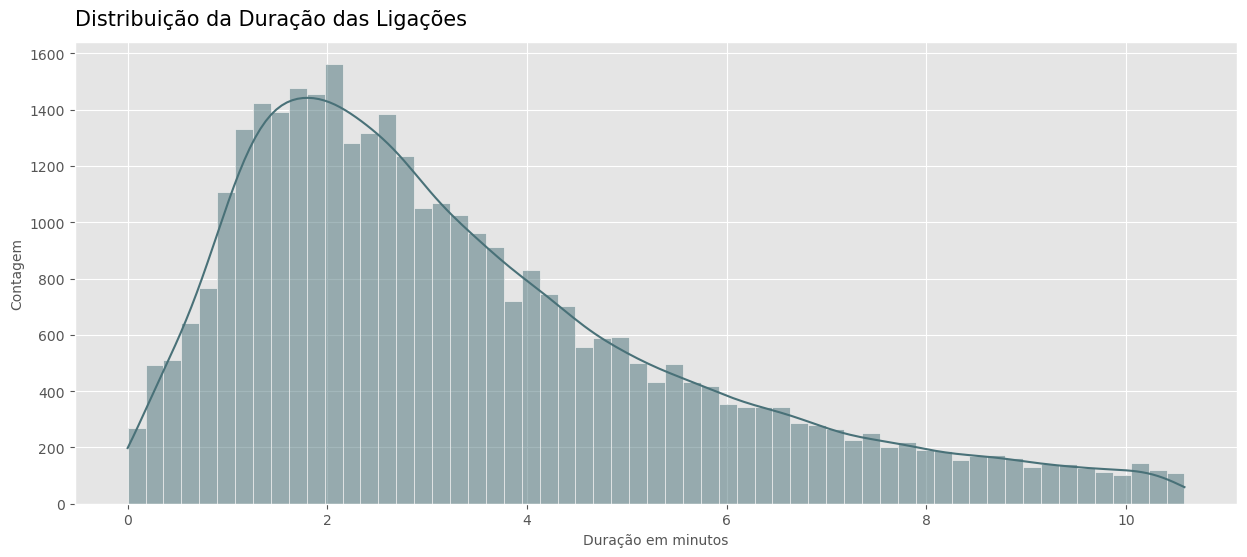

In [54]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.histplot(df, x = (df['duration']/60), kde = True)
ax.set_title('Distribuição da Duração das Ligações', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Duração em minutos', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

In [55]:
campaign_total = df['campaign'].value_counts(normalize = True).reset_index()
campaign_total['proportion'] = (campaign_total['proportion'] * 100).round(2)
campaign_total.rename(columns = {'campaign': 'Número de Contatos', 'proportion': 'Porcentagem (%)'}, inplace = True)
campaign_total

,Número de Contatos,Porcentagem (%)
0,1,41.76
1,2,29.58
2,3,12.94
3,4,8.38
4,5,4.28
5,6,3.05


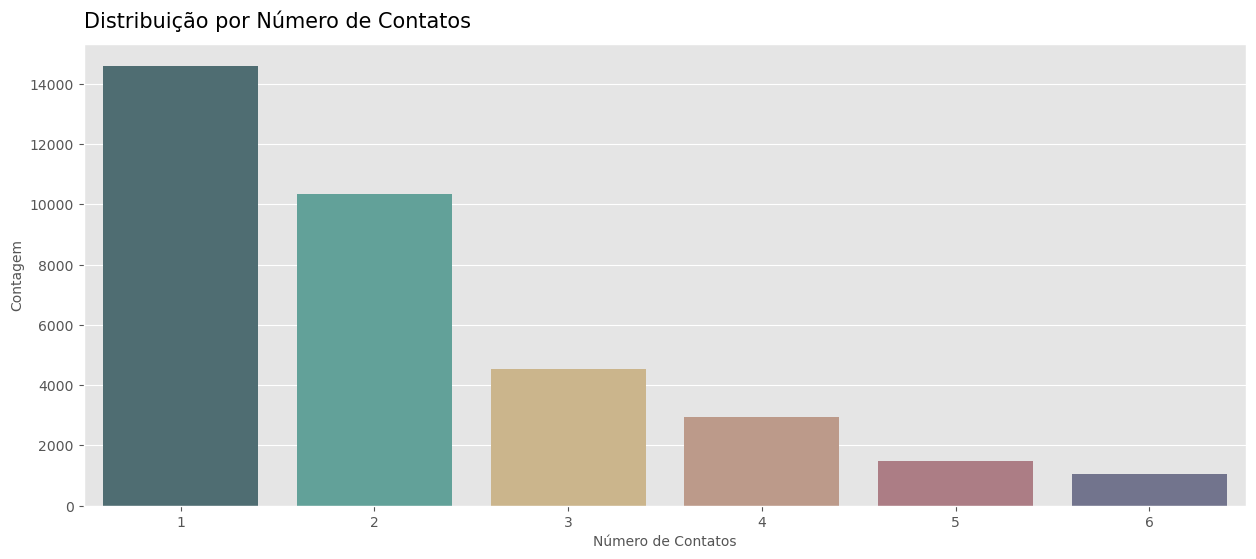

In [56]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(x = df['campaign'].value_counts().index, y = df['campaign'].value_counts().values, palette = my_palette) 
ax.set_title('Distribuição por Número de Contatos', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Número de Contatos', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.show()

O maior volume é de 1 ou 2 contatos feitos, mais a frente vamos buscar saber a relação entre sucesso e o número de contatos.

### Meio de Contato x Aceitação da Campanha

In [112]:
suc_cont = pd.crosstab(index = df['contact'], columns = df['y']).reset_index()
suc_cont['taxa_sucesso'] = ((suc_cont['yes'] / (suc_cont['yes'] + suc_cont['no'])) * 100).round(2)
suc_cont

y,contact,no,yes,taxa_sucesso
0,cellular,20007,2637,11.65
1,telephone,1838,221,10.73
2,unknown,10115,149,1.45


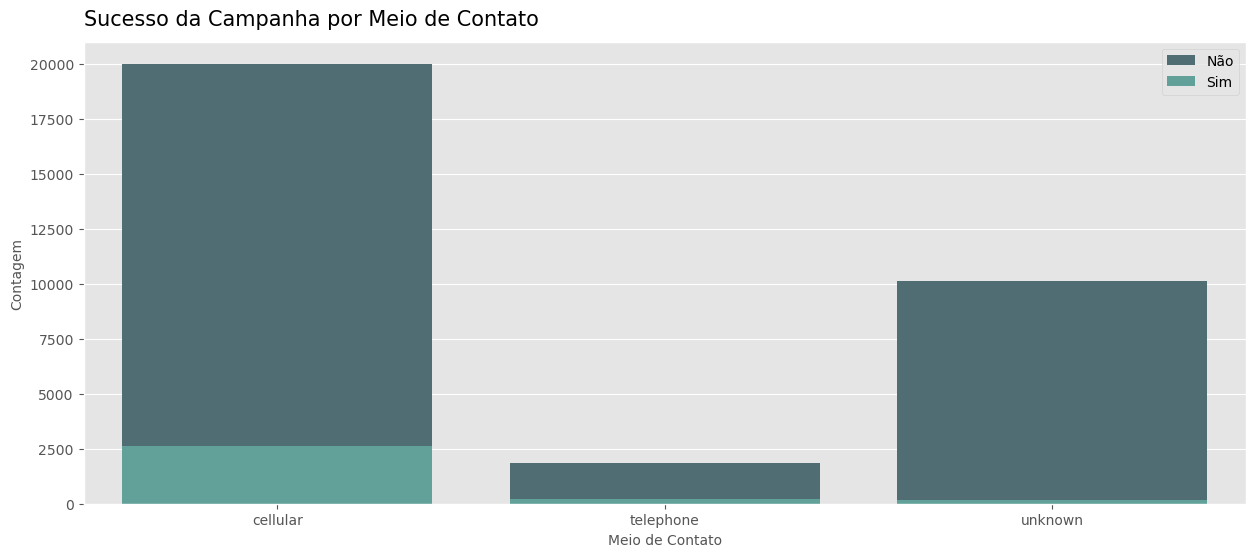

In [113]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_cont, x = 'contact', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_cont, x = 'contact', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Sucesso da Campanha por Meio de Contato', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Meio de Contato', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

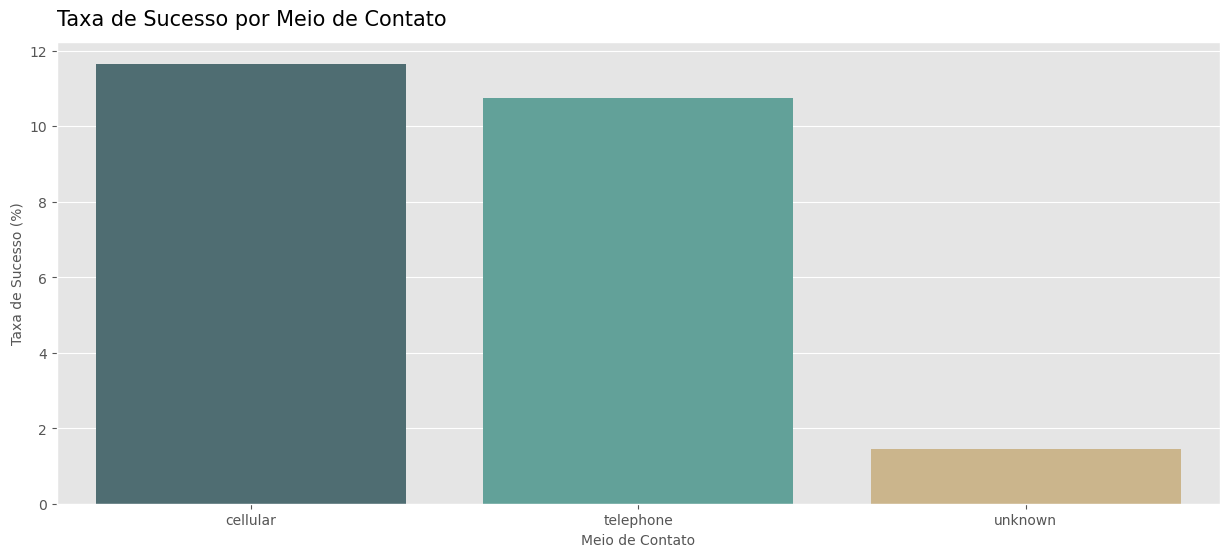

In [114]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_cont, x = 'contact', y = 'taxa_sucesso')
ax.set_title('Taxa de Sucesso por Meio de Contato', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Meio de Contato', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

A maior taxa de sucesso e volume de sucesso está nos contatos por celular.

### Mês do Contato x Aceitação do Produto

In [115]:
suc_mes = pd.crosstab(index = df['month'], columns = df['y']).reset_index()
suc_mes['taxa_sucesso'] = ((suc_mes['yes'] / (suc_mes['yes'] + suc_mes['no'])) * 100).round(2)
suc_mes

y,month,no,yes,taxa_sucesso
0,apr,1948,368,15.89
1,aug,4127,386,8.55
2,dec,89,68,43.31
3,feb,1856,283,13.23
4,jan,1150,80,6.50
5,jul,4965,276,5.27
6,jun,3622,319,8.09
7,mar,174,191,52.33
8,may,10866,404,3.58
9,nov,2582,207,7.42


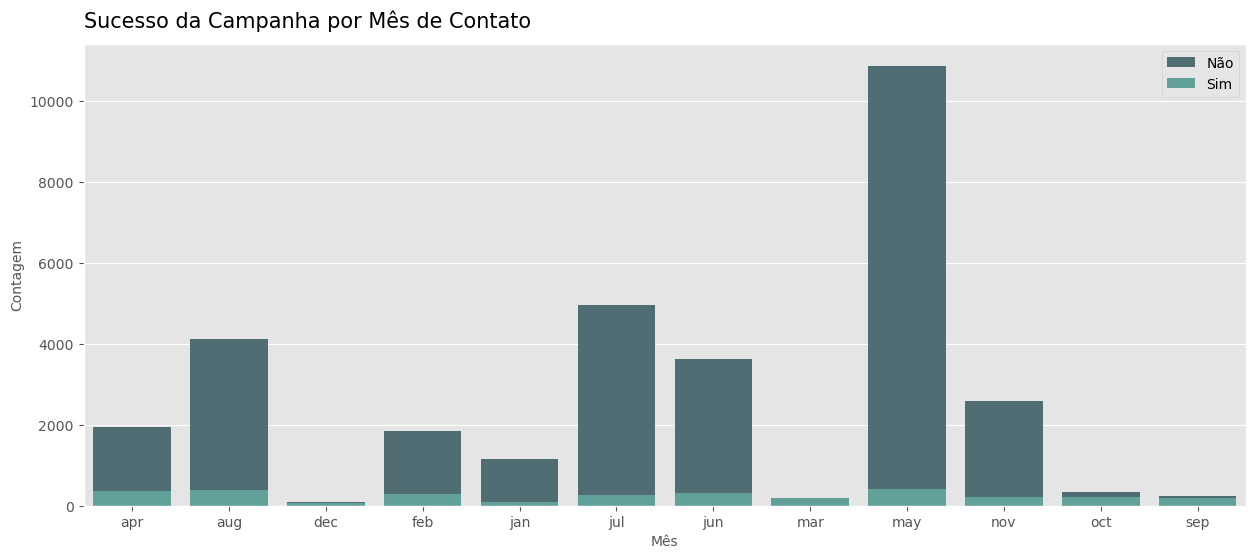

In [116]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_mes, x = 'month', y = 'no', label = 'Não', color = '#497178')
sns.barplot(suc_mes, x = 'month', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Sucesso da Campanha por Mês de Contato', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Mês', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

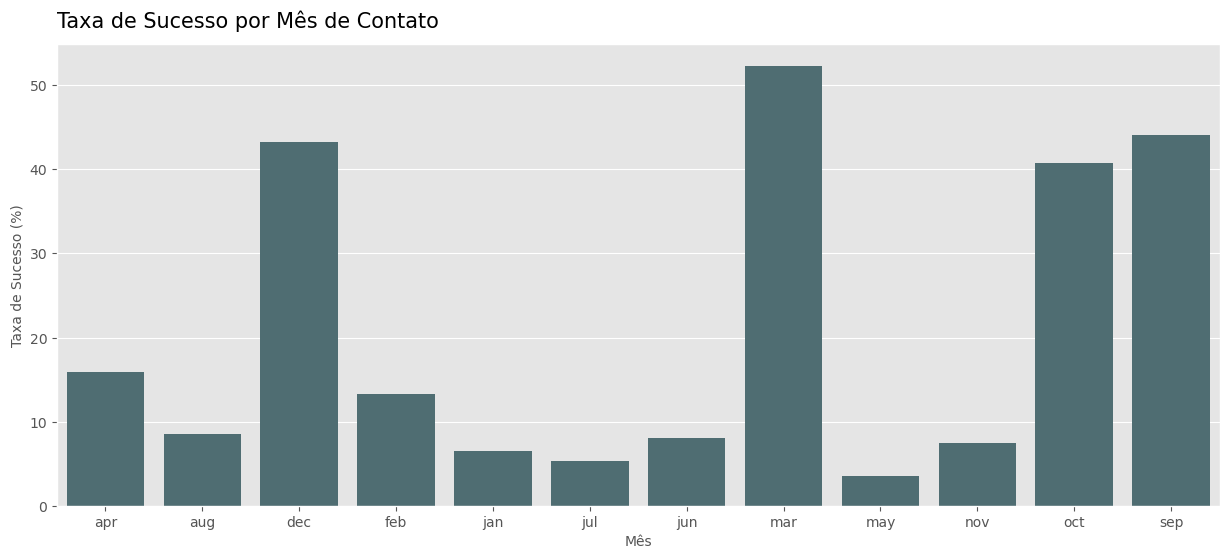

In [137]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(suc_mes, x = 'month', y = 'taxa_sucesso', color = '#497178')
ax.set_title('Taxa de Sucesso por Mês de Contato', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Mês', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

Os meses com as maiores taxas de sucesso em conversão são dezembro, março, outubro e setembro. A época de fim de ano parece propicia para campanhas direcionadas. Podemos pensar isso também em campanhas segmentadas para os públicos com maior porcentagem de sucesso na contratação do produto. 

### Duração das Ligações x Aceitação do Produto

In [132]:
duration_suc = pd.crosstab(index = df['education'], columns = df['y'], values = df['duration'], aggfunc = 'mean').reset_index()
duration_suc['no'] = (duration_suc['no']/60).round(2)
duration_suc['yes'] = (duration_suc['yes']/60).round(2)
duration_suc

y,education,no,yes
0,primary,3.21,5.94
1,secondary,3.32,5.50
2,tertiary,3.15,5.16
3,unknown,3.30,5.02


Ligações que passam de 3 minutos tem maior chance de terminar uma contratação. 

### Número de Contatos x Aceitação do Produto

In [135]:
lig_suc = pd.crosstab(index = df['campaign'], columns = df['y']).reset_index()
lig_suc['taxa_sucesso'] = ((lig_suc['yes'] / (lig_suc['yes'] + lig_suc['no'])) * 100).round(2)
lig_suc

y,campaign,no,yes,taxa_sucesso
0,1,12955,1647,11.28
1,2,9558,784,7.58
2,3,4198,328,7.25
3,4,2796,135,4.61
4,5,1426,72,4.81
5,6,1027,41,3.84


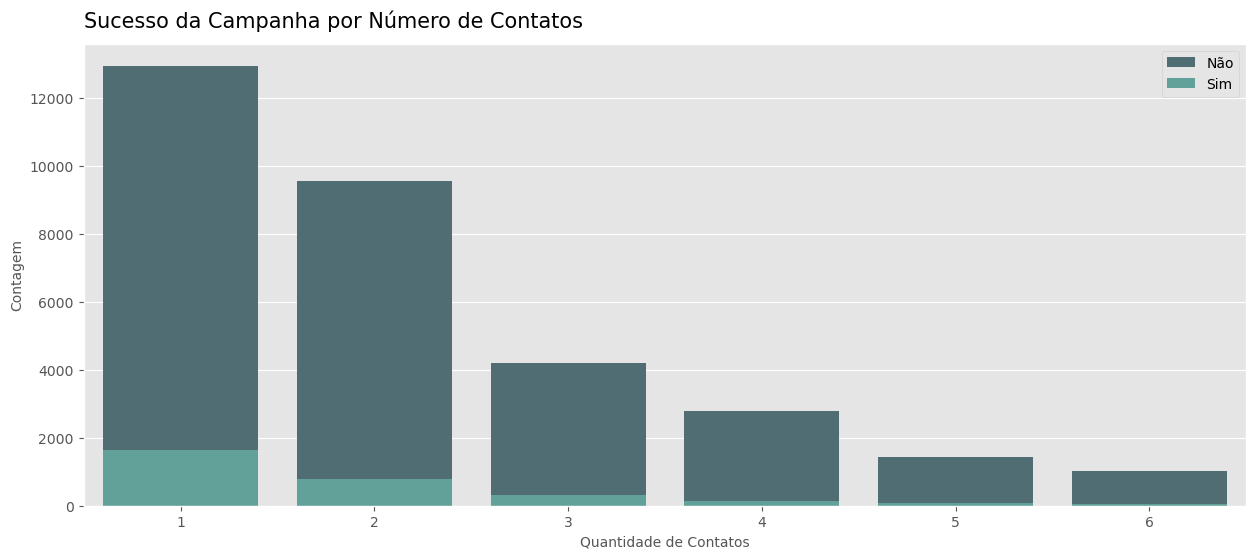

In [136]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(lig_suc, x = 'campaign', y = 'no', label = 'Não', color = '#497178')
sns.barplot(lig_suc, x = 'campaign', y = 'yes', label = 'Sim', color = '#58ABA1')
ax.set_title('Sucesso da Campanha por Número de Contatos', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Quantidade de Contatos', fontsize = 10)
ax.set_ylabel('Contagem', fontsize = 10)
plt.legend()
plt.show()

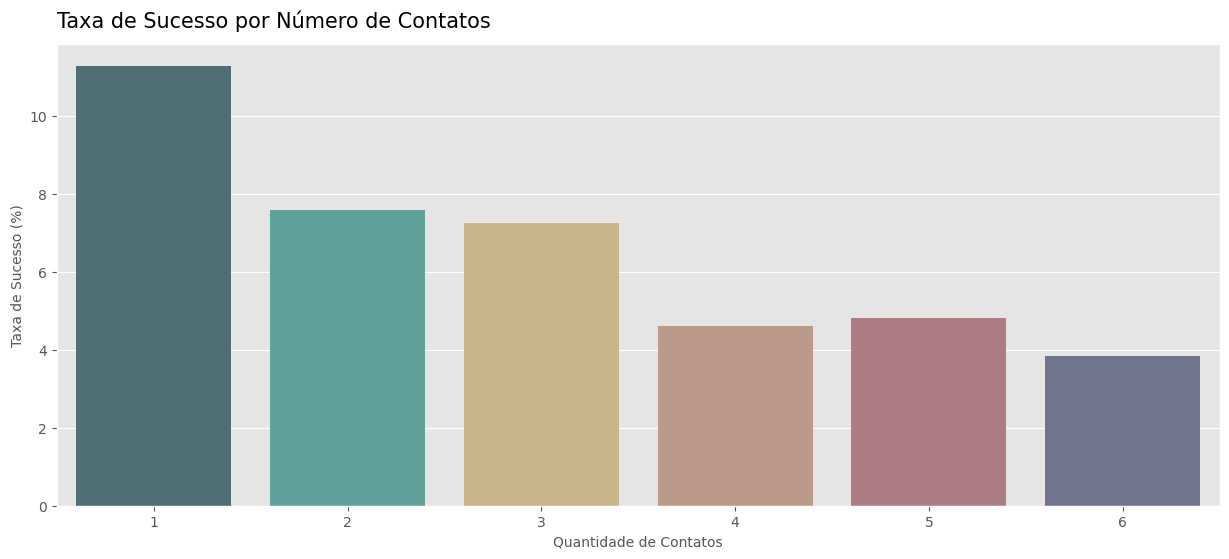

In [140]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.barplot(lig_suc, x = 'campaign', y = 'taxa_sucesso')
ax.set_title('Taxa de Sucesso por Número de Contatos', loc = 'left', fontsize = 15, pad = 12)
ax.set_xlabel('Quantidade de Contatos', fontsize = 10)
ax.set_ylabel('Taxa de Sucesso (%)', fontsize = 10)
plt.show()

A taxa de sucesso é maior na primeira ligação, a segunda e a terceira tem uma taxa de sucesso semelhante e uma grande quada em mais contatos. 

### Alguns insights sobre a campanha

- É necessário treinar a equipe para melhorar o convencimento na primeira ligação. Focar nos grupos mais suscetíveis ao aceite do produto, poderá trazer melhores resultados;
- O tempo de ligação também é um fator, romper a barreira dos 3 minutos traz maior probabilidade de fechamento;
- Os meses de março, setembro, outubro e dezembro são onde se tem maior taxa de conversão, campanhas bem segmentadas combinadas com essas datas podem trazer bons resultados.

# 5. Conclusões

![img](https://images.unsplash.com/photo-1616803140344-6682afb13cda?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

Ao fim foi possível traçar um perfil de clientes em potencial para contratação de serviços do banco, além de buscar entender fatores que possam aumentar a efetivividade das próximas campanhas. Entender o comportamento dos consumidores e o seu perfil é excencial para auxiliar o marketing a otimizar seus resultados e diminuir seus custos, além de naturalmente aumentar os resultados comerciais. 